__X-HEC Data Science for Business MScT - Python for Data Science - 2022/2023__

Contacts:
- Mathurin Massias <mathurin.massias@gmail.com> (or use Slack)
- Sylvain Combettes <sylvain.combettes8@gmail.com> (or use Slack)

<font size="+3"><mark>Plotting and Programming in Python (part 2/3) - Lecture 1 (part 2/2)</mark></font>

<div class="alert alert-block alert-info">
    <b>READ ME</b>
    <ul>
        <li>This lecture is based on Software Carpentry's <a href="https://swcarpentry.github.io/python-novice-gapminder/">Plotting and Programming in Python</a> lesson.</li>
        <ul>
            <li>This notebook covers the essentials from Software Carpentry (from <i>7. Reading Tabular Data into DataFrames</i> to <i>9. Plotting</i> (included)) as well as some important additional tips, tricks and remarks. The content that is present in this notebook but not on Software Carpentry is indicated with <mark>[NEW]</mark>.</li>
            <li>The most important content is highlighted in yellow.</li>
            <li>As this notebook only covers the essentials from Software Carpentry, a careful read of Software Carpentry is still recommended.</li>
        </ul>
        <li>This notebook is a refactored (cleaned and commented) version of the notebook Mathurin live-coded during the first lecture (second part) on Monday, September 26th morning.</li>
        <li>Note that all bash commands are only tested for Unix: for Mac OS and Linux, but not Windows.</li>
    </ul>
</div>

# Reading Tabular Data into DataFrames

## <mark>[NEW]</mark> Get the current working directory

Three alternatives:

In [1]:
import os
os.getcwd()

'C:\\Users\\ivana\\Dropbox\\Education\\X\\Python for Data Science\\Lab1'

In [2]:
from pathlib import Path
Path.cwd()

WindowsPath('C:/Users/ivana/Dropbox/Education/X/Python for Data Science/Lab1')

In [3]:
!cd

C:\Users\ivana\Dropbox\Education\X\Python for Data Science\Lab1


## Use the Pandas library to do statistics on tabular data

- [Pandas](https://pandas.pydata.org/) is a widely-used Python library for statistics, particularly on tabular data.
- Borrows many features from R’s dataframes.
    - A 2-dimensional table whose columns have names and potentially have different data types.
- Load it with `import pandas as pd`. The alias pd is commonly used for Pandas.
- Read a Comma Separated Values (CSV) data file with `pd.read_csv`.
    - Argument is the name of the file to be read.
    - Assign result to a variable to store the data that was read.

In [4]:
import pandas as pd

Read a Comma Separated Values (CSV) data file with `pd.read_csv`:

In [5]:
#!cat data/gapminder_gdp_oceania.csv

In [6]:
data = pd.read_csv("gapminder_gdp_oceania.csv")

Our lessons store their data files in a `data` sub-directory, which is why the path to the file is `data/gapminder_gdp_oceania.csv`. If you forget to include `data/`, you will get an error. Hence, sometimes it might be useful to check your current working directory.

In [7]:
type(data)

pandas.core.frame.DataFrame

The columns in a dataframe are the observed variables, and the rows are the observations.

### <mark>[NEW]</mark> How to display a dataframe?

In [8]:
print(data)  # not user-friendly

       country  gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
0    Australia     10039.59564     10949.64959     12217.22686   
1  New Zealand     10556.57566     12247.39532     13175.67800   

   gdpPercap_1967  gdpPercap_1972  gdpPercap_1977  gdpPercap_1982  \
0     14526.12465     16788.62948     18334.19751     19477.00928   
1     14463.91893     16046.03728     16233.71770     17632.41040   

   gdpPercap_1987  gdpPercap_1992  gdpPercap_1997  gdpPercap_2002  \
0     21888.88903     23424.76683     26997.93657     30687.75473   
1     19007.19129     18363.32494     21050.41377     23189.80135   

   gdpPercap_2007  
0     34435.36744  
1     25185.00911  


In [9]:
data  # much nicer

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
1,New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


<mark>[NEW]</mark> Using `display`:

In [10]:
display(data)

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
1,New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


<mark>[NEW] You can also look into Pandas [styling](https://pandas.pydata.org/pandas-docs/version/1.1/user_guide/style.html)</mark>:

In [11]:
display(
    data.style.background_gradient(
        axis=1,
        cmap='YlOrRd',
    ).format(precision=1)
)

TypeError: format() got an unexpected keyword argument 'precision'

## Use `index_col` to specify that a column's values should be used as row headings

In [12]:
data = pd.read_csv(
    "gapminder_gdp_oceania.csv", 
    index_col="country"
)

In [13]:
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


## Use the `DataFrame.info()` method to find out more about a dataframe

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Australia to New Zealand
Data columns (total 12 columns):
gdpPercap_1952    2 non-null float64
gdpPercap_1957    2 non-null float64
gdpPercap_1962    2 non-null float64
gdpPercap_1967    2 non-null float64
gdpPercap_1972    2 non-null float64
gdpPercap_1977    2 non-null float64
gdpPercap_1982    2 non-null float64
gdpPercap_1987    2 non-null float64
gdpPercap_1992    2 non-null float64
gdpPercap_1997    2 non-null float64
gdpPercap_2002    2 non-null float64
gdpPercap_2007    2 non-null float64
dtypes: float64(12)
memory usage: 208.0+ bytes


### <mark>[NEW]</mark> Getting each information given in `DataFrame.info()` independently:

In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
data.shape

(2, 12)

In [17]:
data.columns

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')

In [18]:
data.dtypes

gdpPercap_1952    float64
gdpPercap_1957    float64
gdpPercap_1962    float64
gdpPercap_1967    float64
gdpPercap_1972    float64
gdpPercap_1977    float64
gdpPercap_1982    float64
gdpPercap_1987    float64
gdpPercap_1992    float64
gdpPercap_1997    float64
gdpPercap_2002    float64
gdpPercap_2007    float64
dtype: object

In [19]:
data.isna().sum()  # number of missing values (which is the complementary of the non-null values)

gdpPercap_1952    0
gdpPercap_1957    0
gdpPercap_1962    0
gdpPercap_1967    0
gdpPercap_1972    0
gdpPercap_1977    0
gdpPercap_1982    0
gdpPercap_1987    0
gdpPercap_1992    0
gdpPercap_1997    0
gdpPercap_2002    0
gdpPercap_2007    0
dtype: int64

In [20]:
data.isna().mean()  # percentage of missing values

gdpPercap_1952    0.0
gdpPercap_1957    0.0
gdpPercap_1962    0.0
gdpPercap_1967    0.0
gdpPercap_1972    0.0
gdpPercap_1977    0.0
gdpPercap_1982    0.0
gdpPercap_1987    0.0
gdpPercap_1992    0.0
gdpPercap_1997    0.0
gdpPercap_2002    0.0
gdpPercap_2007    0.0
dtype: float64

In [21]:
data.memory_usage()  # memory usage of each column in bytes

Index             16
gdpPercap_1952    16
gdpPercap_1957    16
gdpPercap_1962    16
gdpPercap_1967    16
gdpPercap_1972    16
gdpPercap_1977    16
gdpPercap_1982    16
gdpPercap_1987    16
gdpPercap_1992    16
gdpPercap_1997    16
gdpPercap_2002    16
gdpPercap_2007    16
dtype: int64

In [22]:
data.memory_usage().sum()  # memory usage of all columns in bytes

208

## The `DataFrame.columns` variable stores information about the dataframe’s columns

- <mark>Note that this is data, *not* a method. (It doesn’t have parentheses.)</mark>
    - Like `math.pi`.
    - So do not use `()` to try to call it.
- Called a *member variable*, or just *member*.

In [23]:
print(data.columns)

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')


## Use `DataFrame.T` to transpose a dataframe

Transpose (written `.T`) doesn't copy the data, just changes the program's view of it.

In [24]:
data.T

country,Australia,New Zealand
gdpPercap_1952,10039.59564,10556.57566
gdpPercap_1957,10949.64959,12247.39532
gdpPercap_1962,12217.22686,13175.67800
gdpPercap_1967,14526.12465,14463.91893
gdpPercap_1972,16788.62948,16046.03728
gdpPercap_1977,18334.19751,16233.71770
gdpPercap_1982,19477.00928,17632.41040
gdpPercap_1987,21888.88903,19007.19129
gdpPercap_1992,23424.76683,18363.32494
gdpPercap_1997,26997.93657,21050.41377


## Use `DataFrame.describe()` to get summary statistics about data

`DataFrame.describe()` gets the summary statistics of only the columns that have numerical data. All other columns are ignored, unless you use the argument `include='all'`.

In [25]:
data.describe()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
std,365.560078,917.644806,677.727301,43.986086,525.09198,1485.263517,1304.328377,2037.668013,3578.979883,4205.533703,5301.853680,6540.991104
min,10039.595640,10949.649590,12217.226860,14463.918930,16046.03728,16233.717700,17632.410400,19007.191290,18363.324940,21050.413770,23189.801350,25185.009110
25%,10168.840645,11274.086022,12456.839645,14479.470360,16231.68533,16758.837652,18093.560120,19727.615725,19628.685413,22537.294470,25064.289695,27497.598692
50%,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
75%,10427.330655,11922.958888,12936.065215,14510.573220,16602.98143,17809.077557,19015.859560,21168.464595,22159.406358,25511.055870,28813.266385,32122.777857
max,10556.575660,12247.395320,13175.678000,14526.124650,16788.62948,18334.197510,19477.009280,21888.889030,23424.766830,26997.936570,30687.754730,34435.367440


## Reading Other Data

In [26]:
americas = pd.read_csv(
    "gapminder_gdp_americas.csv", 
    index_col="country"
)

In [27]:
americas.describe()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4079.062552,4616.043733,4901.541870,5668.253496,6491.334139,7352.007126,7506.737088,7793.400261,8044.934406,8889.300863,9287.677107,11003.031625
std,3001.727522,3312.381083,3421.740569,4160.885560,4754.404329,5355.602518,5530.490471,6665.039509,7047.089191,7874.225145,8895.817785,9713.209302
min,1397.717137,1544.402995,1662.137359,1452.057666,1654.456946,1874.298931,2011.159549,1823.015995,1456.309517,1341.726931,1270.364932,1201.637154
25%,2428.237769,2487.365989,2750.364446,3242.531147,4031.408271,4756.763836,4258.503604,4140.442097,4439.450840,4684.313807,4858.347495,5728.353514
50%,3048.302900,3780.546651,4086.114078,4643.393534,5305.445256,6281.290855,6434.501797,6360.943444,6618.743050,7113.692252,6994.774861,8948.102923
75%,3939.978789,4756.525781,5180.755910,5788.093330,6809.406690,7674.929108,8997.897412,7807.095818,8137.004775,9767.297530,8797.640716,11977.574960
max,13990.482080,14847.127120,16173.145860,19530.365570,21806.035940,24072.632130,25009.559140,29884.350410,32003.932240,35767.433030,39097.099550,42951.653090


## Inspecting Data

In [28]:
americas.head?

In [29]:
americas.head()

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,,
Argentina,Americas,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
Bolivia,Americas,2677.326347,2127.686326,2180.972546,2586.886053,2980.331339,3548.097832,3156.510452,2753.691490,2961.699694,3326.143191,3413.262690,3822.137084
Brazil,Americas,2108.944355,2487.365989,3336.585802,3429.864357,4985.711467,6660.118654,7030.835878,7807.095818,6950.283021,7957.980824,8131.212843,9065.800825
Canada,Americas,11367.161120,12489.950060,13462.485550,16076.588030,18970.570860,22090.883060,22898.792140,26626.515030,26342.884260,28954.925890,33328.965070,36319.235010
Chile,Americas,3939.978789,4315.622723,4519.094331,5106.654313,5494.024437,4756.763836,5095.665738,5547.063754,7596.125964,10118.053180,10778.783850,13171.638850


In [30]:
americas.head(n=2)

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,,
Argentina,Americas,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
Bolivia,Americas,2677.326347,2127.686326,2180.972546,2586.886053,2980.331339,3548.097832,3156.510452,2753.691490,2961.699694,3326.143191,3413.262690,3822.137084


In [31]:
americas.head(2)

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,,
Argentina,Americas,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
Bolivia,Americas,2677.326347,2127.686326,2180.972546,2586.886053,2980.331339,3548.097832,3156.510452,2753.691490,2961.699694,3326.143191,3413.262690,3822.137084


In [32]:
americas.tail(2)

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,,
Uruguay,Americas,5716.766744,6150.772969,5603.357717,5444.619620,5703.408898,6504.339663,6920.223051,7452.398969,8137.004775,9230.240708,7727.002004,10611.46299
Venezuela,Americas,7689.799761,9802.466526,8422.974165,9541.474188,10505.259660,13143.950950,11152.410110,9883.584648,10733.926310,10165.495180,8605.047831,11415.80569


<mark>[NEW]</mark> Returning a random sample of items:

In [33]:
americas.sample(5, random_state=0)

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,,
Colombia,Americas,2144.115096,2323.805581,2492.351109,2678.729839,3264.660041,3815.807870,4397.575659,4903.219100,5444.648617,6117.361746,5755.259962,7006.580419
Brazil,Americas,2108.944355,2487.365989,3336.585802,3429.864357,4985.711467,6660.118654,7030.835878,7807.095818,6950.283021,7957.980824,8131.212843,9065.800825
Peru,Americas,3758.523437,4245.256698,4957.037982,5788.093330,5937.827283,6281.290855,6434.501797,6360.943444,4446.380924,5838.347657,5909.020073,7408.905561
Nicaragua,Americas,3112.363948,3457.415947,3634.364406,4643.393534,4688.593267,5486.371089,3470.338156,2955.984375,2170.151724,2253.023004,2474.548819,2749.320965
Guatemala,Americas,2428.237769,2617.155967,2750.364446,3242.531147,4031.408271,4879.992748,4820.494790,4246.485974,4439.450840,4684.313807,4858.347495,5186.050003


<mark>[NEW]</mark> Using `display` for dataframes in notebook cells is crucial because otherwise only the last dataframe is displayed:

In [34]:
americas.head(2)
americas.tail(2)  # only the last one is displayed

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,,
Uruguay,Americas,5716.766744,6150.772969,5603.357717,5444.619620,5703.408898,6504.339663,6920.223051,7452.398969,8137.004775,9230.240708,7727.002004,10611.46299
Venezuela,Americas,7689.799761,9802.466526,8422.974165,9541.474188,10505.259660,13143.950950,11152.410110,9883.584648,10733.926310,10165.495180,8605.047831,11415.80569


In [35]:
display(americas.head(2))  # displayed
display(americas.tail(2))  # also displayed

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,,
Argentina,Americas,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
Bolivia,Americas,2677.326347,2127.686326,2180.972546,2586.886053,2980.331339,3548.097832,3156.510452,2753.691490,2961.699694,3326.143191,3413.262690,3822.137084


,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,,
Uruguay,Americas,5716.766744,6150.772969,5603.357717,5444.619620,5703.408898,6504.339663,6920.223051,7452.398969,8137.004775,9230.240708,7727.002004,10611.46299
Venezuela,Americas,7689.799761,9802.466526,8422.974165,9541.474188,10505.259660,13143.950950,11152.410110,9883.584648,10733.926310,10165.495180,8605.047831,11415.80569


## Writing Data

As well as the `read_csv` function for reading data from a file, Pandas provides a `to_csv` function to write dataframes to files.

# Pandas DataFrames

## Note about Pandas DataFrames/Series

- A [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is a collection of [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html); The DataFrame is the way Pandas represents a table, and Series is the data-structure Pandas use to represent a column.
- Pandas is built on top of the [Numpy](http://www.numpy.org/) library, which in practice means that most of the methods defined for Numpy Arrays apply to Pandas Series/DataFrames.
- What makes Pandas so attractive is the powerful interface to access individual records of the table, proper handling of missing values, and relational-databases operations between DataFrames.
- <mark>[NEW]</mark> The elements of a NumPy array must all be of the same type, whereas the elements of a Python list or a Pandas DataFrame can be of completely different types.

## Selecting values

To access a value at the position `[i, j]` of a DataFrame, we have two options, depending on what is the meaning of `i` in use. Remember that a DataFrame provides an *index* as a way to identify the rows of the table; a row, then, has a *position* inside the table as well as a *label*, which uniquely identifies its *entry* in the DataFrame.

## Use `DataFrame.iloc[..., ...]` to select values by their (entry) position

In [36]:
europe = pd.read_csv(
    "gapminder_gdp_europe.csv", 
    index_col="country"
)

In [37]:
europe.head(n=3)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.00391,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.42230,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.97448,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080


How access data from `europe`? First of all, using `iloc` through the index, which is not convenient:

In [38]:
europe.iloc[0, 0]

1601.056136

In [39]:
europe.iloc[0, 1]

1942.2842440000002

In [40]:
europe.iloc[2, 3]

13149.04119

Another method is using `loc`:

## Use `DataFrame.loc[..., ...]` to select values by their (entry) label.

Can specify location by row and/or column name.

In [41]:
europe.loc["Albania", "gdpPercap_1952"]

1601.056136

In [42]:
europe.loc["France", "gdpPercap_1967"]

12999.91766

## Use `:` on its own to mean all columns or all rows

Just like Python's usual slicing notation.

In [43]:
europe.loc["France", :]

gdpPercap_1952     7029.809327
gdpPercap_1957     8662.834898
gdpPercap_1962    10560.485530
gdpPercap_1967    12999.917660
gdpPercap_1972    16107.191710
gdpPercap_1977    18292.635140
gdpPercap_1982    20293.897460
gdpPercap_1987    22066.442140
gdpPercap_1992    24703.796150
gdpPercap_1997    25889.784870
gdpPercap_2002    28926.032340
gdpPercap_2007    30470.016700
Name: France, dtype: float64

Would get the same result printing `data.loc["France"]` (without a second index).

In [44]:
europe.loc[:, "gdpPercap_1997"]

country
Albania                    3193.054604
Austria                   29095.920660
Belgium                   27561.196630
Bosnia and Herzegovina     4766.355904
Bulgaria                   5970.388760
Croatia                    9875.604515
Czech Republic            16048.514240
Denmark                   29804.345670
Finland                   23723.950200
France                    25889.784870
Germany                   27788.884160
Greece                    18747.698140
Hungary                   11712.776800
Iceland                   28061.099660
Ireland                   24521.947130
Italy                     24675.024460
Montenegro                 6465.613349
Netherlands               30246.130630
Norway                    41283.164330
Poland                    10159.583680
Portugal                  17641.031560
Romania                    7346.547557
Serbia                     7914.320304
Slovak Republic           12126.230650
Slovenia                  17161.107350
Spain            

- Would get the same result printing `europe["gdpPercap_1997"]`.
- Also get the same result printing `europe.gdpPercap_1997` (not recommended, because easily confused with `.` notation for methods)

## Select multiple columns or rows using `DataFrame.loc` and a named slice

<mark>[NEW]</mark> Remember, for strings:

In [45]:
atom_name = "helium"
print(atom_name[1:3])

el


For dataframes:

In [46]:
europe["Slovenia":"Switzerland"]

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Slovenia,4215.041741,5862.276629,7402.303395,9405.489397,12383.48620,15277.03017,17866.72175,18678.53492,14214.71681,17161.10735,20660.01936,25768.25759
Spain,3834.034742,4564.802410,5693.843879,7993.512294,10638.75131,13236.92117,13926.16997,15764.98313,18603.06452,20445.29896,24835.47166,28821.06370
Sweden,8527.844662,9911.878226,12329.441920,15258.296970,17832.02464,18855.72521,20667.38125,23586.92927,23880.01683,25266.59499,29341.63093,33859.74835
Switzerland,14734.232750,17909.489730,20431.092700,22966.144320,27195.11304,26982.29052,28397.71512,30281.70459,31871.53030,32135.32301,34480.95771,37506.41907


In [47]:
type(europe.loc["Slovenia":"Switzerland"])

pandas.core.frame.DataFrame

In [48]:
print(europe.loc["Italy", "gdpPercap_1957":"gdpPercap_1967"])

gdpPercap_1957     6248.656232
gdpPercap_1962     8243.582340
gdpPercap_1967    10022.401310
Name: Italy, dtype: float64


In [49]:
europe.loc["Italy", "gdpPercap_1957":"gdpPercap_1967"].max()

10022.40131

In [50]:
subset = europe.loc["Italy":"Poland", "gdpPercap_1957":"gdpPercap_1977"]
subset

,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977
country,,,,,
Italy,6248.656232,8243.582340,10022.401310,12269.273780,14255.984750
Montenegro,3682.259903,4649.593785,5907.850937,7778.414017,9595.929905
Netherlands,11276.193440,12790.849560,15363.251360,18794.745670,21209.059200
Norway,11653.973040,13450.401510,16361.876470,18965.055510,23311.349390
Poland,4734.253019,5338.752143,6557.152776,8006.506993,9508.141454


In the above code, we discover that slicing using `loc` is inclusive at both ends, which differs from slicing using `iloc`, where slicing indicates everything up to but not including the final index.

## Result of slicing can be used in further operations

All the statistical operators that work on entire dataframes work the same way on slices.

In [51]:
subset.max()

gdpPercap_1957    11653.97304
gdpPercap_1962    13450.40151
gdpPercap_1967    16361.87647
gdpPercap_1972    18965.05551
gdpPercap_1977    23311.34939
dtype: float64

In [52]:
subset.min()

gdpPercap_1957    3682.259903
gdpPercap_1962    4649.593785
gdpPercap_1967    5907.850937
gdpPercap_1972    7778.414017
gdpPercap_1977    9508.141454
dtype: float64

## Use comparisons to select data based on value

- Comparison is applied element by element.
- Returns a similarly-shaped dataframe of `True` and `False`.

<mark>[NEW]</mark> Remember, for numerical values:

In [53]:
age = 42
print(age > 30)
print(age >= 50)

True
False


For dataframes:

In [54]:
# Which values were greater than 10000?
subset > 10000

,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977
country,,,,,
Italy,False,False,True,True,True
Montenegro,False,False,False,False,False
Netherlands,True,True,True,True,True
Norway,True,True,True,True,True
Poland,False,False,False,False,False


<mark>[NEW]</mark> `10_000` is a syntactic sugar for `10000`:

In [55]:
10_000 == 10000

True

Hence, it is recommended to use:

In [56]:
subset > 10_000

,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977
country,,,,,
Italy,False,False,True,True,True
Montenegro,False,False,False,False,False
Netherlands,True,True,True,True,True
Norway,True,True,True,True,True
Poland,False,False,False,False,False


## Select values or NaN using a Boolean mask

A frame full of Booleans is sometimes called a mask because of how it can be used.

In [57]:
mask = subset > 10_000
subset[mask]

,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977
country,,,,,
Italy,NaN,NaN,10022.40131,12269.27378,14255.98475
Montenegro,NaN,NaN,NaN,NaN,NaN
Netherlands,11276.19344,12790.84956,15363.25136,18794.74567,21209.05920
Norway,11653.97304,13450.40151,16361.87647,18965.05551,23311.34939
Poland,NaN,NaN,NaN,NaN,NaN


Or directly:

In [58]:
subset[subset > 10_000]

,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977
country,,,,,
Italy,NaN,NaN,10022.40131,12269.27378,14255.98475
Montenegro,NaN,NaN,NaN,NaN,NaN
Netherlands,11276.19344,12790.84956,15363.25136,18794.74567,21209.05920
Norway,11653.97304,13450.40151,16361.87647,18965.05551,23311.34939
Poland,NaN,NaN,NaN,NaN,NaN


- Get the value where the mask is true, and NaN (Not a Number) where it is false. <mark>[NEW]</mark> In computing, NaN is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable. In practise, it often corresponds to a missing value.
- Useful because NaNs are ignored by operations like max, min, average, etc.

In [59]:
subset[subset > 10_000].mean()  # beware, the operation is column-wise by default

gdpPercap_1957    11465.083240
gdpPercap_1962    13120.625535
gdpPercap_1967    13915.843047
gdpPercap_1972    16676.358320
gdpPercap_1977    19592.131113
dtype: float64

In [60]:
subset[subset > 10_000].mean(axis=1)  # the operation is row-wise

country
Italy          12182.553280
Montenegro              NaN
Netherlands    15886.819846
Norway         16748.531184
Poland                  NaN
dtype: float64

## Group By: split-apply-combine

Pandas vectorizing methods and grouping operations are features that provide users much flexibility to analyse their data.

For instance, let's say we want to have a clearer view on how the European countries split themselves according to their GDP.

1. We may have a glance by splitting the countries in two groups during the years surveyed, those who presented a GDP higher than the European average and those with a lower GDP.
1. We then estimate a wealthy score based on the historical (from 1962 to 2007) values, where we account how many times a country has participated in the groups of lower or higher GDP

In [61]:
mask_higher = europe > europe.mean()

In [62]:
mask_higher.head(5)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,False,False,False,False,False,False,False,False,False,False,False,False
Austria,True,True,True,True,True,True,True,True,True,True,True,True
Belgium,True,True,True,True,True,True,True,True,True,True,True,True
Bosnia and Herzegovina,False,False,False,False,False,False,False,False,False,False,False,False
Bulgaria,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
wealth_score = mask_higher.aggregate('sum', axis=1) / len(data.columns)
display(wealth_score)

country
Albania                   0.000000
Austria                   1.000000
Belgium                   1.000000
Bosnia and Herzegovina    0.000000
Bulgaria                  0.000000
Croatia                   0.000000
Czech Republic            0.500000
Denmark                   1.000000
Finland                   1.000000
France                    1.000000
Germany                   1.000000
Greece                    0.333333
Hungary                   0.000000
Iceland                   1.000000
Ireland                   0.333333
Italy                     0.500000
Montenegro                0.000000
Netherlands               1.000000
Norway                    1.000000
Poland                    0.000000
Portugal                  0.000000
Romania                   0.000000
Serbia                    0.000000
Slovak Republic           0.000000
Slovenia                  0.333333
Spain                     0.333333
Sweden                    1.000000
Switzerland               1.000000
Turkey      

An alternative:

In [64]:
wealth_score = mask_higher.agg('sum', axis=1) / len(data.columns)
display(wealth_score.head())

country
Albania                   0.0
Austria                   1.0
Belgium                   1.0
Bosnia and Herzegovina    0.0
Bulgaria                  0.0
dtype: float64

Another alternative:

In [65]:
wealth_score = mask_higher.sum(axis=1) / len(data.columns)
display(wealth_score.head())

country
Albania                   0.0
Austria                   1.0
Belgium                   1.0
Bosnia and Herzegovina    0.0
Bulgaria                  0.0
dtype: float64

Finally, for each group in the `wealth_score` table, we sum their (financial) contribution across the years surveyed using chained methods:

In [66]:
europe.groupby(wealth_score).sum()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0.000000,36916.854200,46110.918793,56850.065437,71324.848786,88569.346898,104459.358438,113553.768507,119649.599409,92380.047256,103772.937598,118590.929863,149577.357928
0.333333,16790.046878,20942.456800,25744.935321,33567.667670,45277.839976,53860.456750,59679.634020,64436.912960,67918.093220,80876.051580,102086.795210,122803.729520
0.500000,11807.544405,14505.000150,18380.449470,21421.846200,25377.727380,29056.145370,31914.712050,35517.678220,36310.666080,40723.538700,45564.308390,51403.028210
1.000000,104317.277560,127332.008735,149989.154201,178000.350040,215162.343140,241143.412730,263388.781960,296825.131210,315238.235970,346930.926170,385109.939210,427850.333420


## Selection of Individual Values

Write an expression to find the Per Capita GDP of Serbia in 2007.

In [67]:
europe.loc["Serbia", "gdpPercap_2007"]

9786.534714

## Exploring available methods using the `dir()` function

Python includes a `dir()` function that can be used to display all of the available methods (functions) that are built into a data object.

In [68]:
dir(europe)[0:10]  # just print an excerpt

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__']

## <mark>[NEW]</mark> Further reading on pandas

1. [Data Wrangling
with pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
1. [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
1. [Pandas user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)
1. [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)

# Plotting

## [`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python

- Commonly use a sub-library called `matplotlib.pyplot`.
- The Jupyter Notebook will render plots inline by default.

In [69]:
import matplotlib.pyplot as plt

Simple plots are then (fairly) simple to create:

Text(0, 0.5, 'Position (km)')

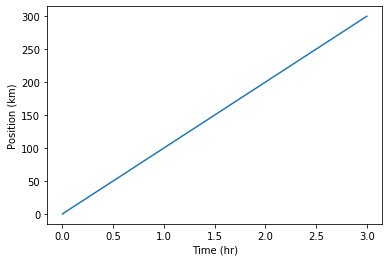

In [70]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]
plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

In our Jupyter Notebook example, running the cell should generate the figure directly below the code. The figure is also included in the Notebook document for future viewing. However, other Python environments like an interactive Python session started from a terminal or a Python script executed via the command line require an additional command to display the figure.

Instruct `matplotlib` to show a figure:
```python
plt.show()
```
This command can also be used within a Notebook - for instance, to display multiple figures if several are created by a single cell.

<mark>[NEW]</mark> In the output above, on top of the figure, we have `Text(0, 0.5, 'Position (km)')` because the last line returns something. In order to remove it, you can use a placeholder (`_`):

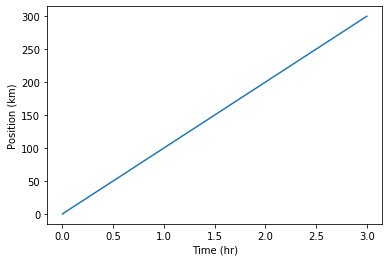

In [71]:
plt.plot(time, position)
plt.xlabel('Time (hr)')
_ = plt.ylabel('Position (km)')

An alternative is to put `;` at the end of the last line of the cell:

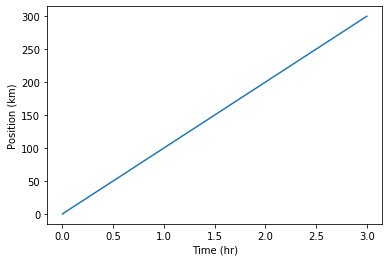

In [72]:
plt.plot(time, position)
plt.xlabel('Time (hr)')
_ = plt.ylabel('Position (km)')

Another way to do `plt.show()`:

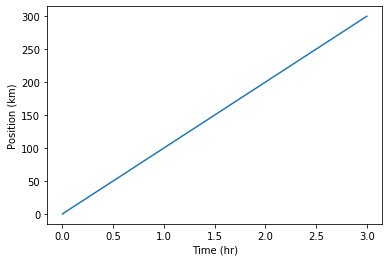

In [73]:
plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
plt.show()

<mark>[NEW]</mark> You can change a lot of settings:

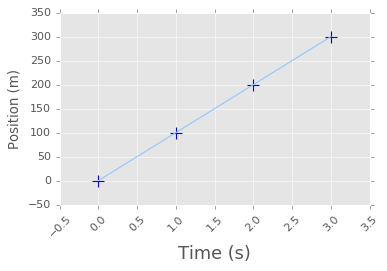

In [124]:
plt.figure(figsize=(5, 3))
plt.scatter(time, position, marker='+', s=100)
plt.plot(time, position)
plt.ylabel("Position (m)")
plt.xlabel("Time (s)", fontsize=16)
plt.xticks(rotation=45);

## Plot data directly from a Pandas dataframe

- We can also plot Pandas dataframes.
- This implicitly uses matplotlib.pyplot.
- Before plotting, we convert the column headings from a string to integer data type, since they represent numerical values

In [125]:
oceania = pd.read_csv('gapminder_gdp_oceania.csv', index_col='country')

### <mark>[NEW]</mark> From the column names, extract a list with the years only as integers

Extract year from last 4 characters of each column name. The current column names are structured as `'gdpPercap_(year)'`, so we want to keep the (year) part only for clarity when plotting GDP vs. years.

An example:

In [126]:
some_names = ["Sylvain", "Mathurin", "Alice", "Bob"]

long_names = []
for name in some_names:
    print(name)
    if len(name) >= 6:
        print("this is a long name")
        long_names.append(name)

Sylvain
this is a long name
Mathurin
this is a long name
Alice
Bob


In [127]:
long_names

['Sylvain', 'Mathurin']

In our case:

In [128]:
years = []
for col in oceania.columns:
    year = int(col[-4:])
    years.append(year)

In [129]:
years

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

To do this we can also use `strip()`, which removes from the string the characters stated in the argument. This method works on strings, so we call str before `strip()`.

In [130]:
"Mathurin".strip("Ma")

'thurin'

In [131]:
"Sylvain".strip("Ma")

'Sylvain'

In [132]:
years = []
for col in oceania.columns:
    year = int(col.strip("gdpPercap_"))
    years.append(year)

In [133]:
years

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

Another alternative a comprehension list:

In [134]:
years_str = oceania.columns.str.strip("gdpPercap_")
years_str

Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')

Convert year values to integers:

In [135]:
years = [int(elem) for elem in years_str]
years

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

You can now change the columns names:

In [136]:
oceania.columns = years

In [137]:
oceania.head()

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


You can also convert year values to integers, saving results back to dataframe:

In [138]:
oceania_2.columns

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64')

In [139]:
oceania_2 = pd.read_csv('gapminder_gdp_oceania.csv', index_col='country')
years = oceania_2.columns.str.strip('gdpPercap_')
oceania_2.columns = years.astype(int)
oceania_2.head()

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


### Plot Pandas dataframes

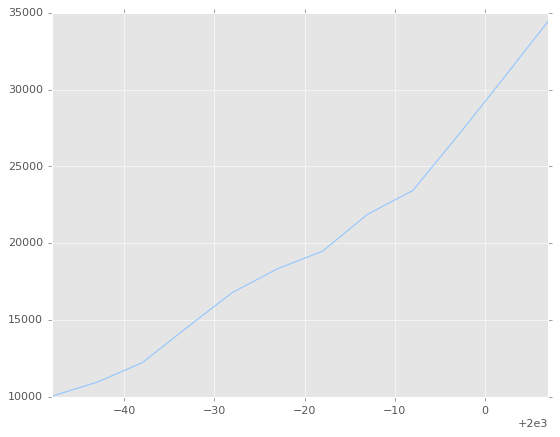

In [140]:
oceania.loc['Australia'].plot();

## Select and transform data, then plot it

- By default, `DataFrame.plot` plots with the rows as the X axis.
- We can transpose the data in order to plot multiple series.

In [141]:
!python --version

Python 3.7.4


In [142]:
plt.style.available[:5]

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight']

In [143]:
oceania.T.head()

country,Australia,New Zealand
1952,10039.59564,10556.57566
1957,10949.64959,12247.39532
1962,12217.22686,13175.67800
1967,14526.12465,14463.91893
1972,16788.62948,16046.03728


In [144]:
plt.style.use('seaborn-pastel')

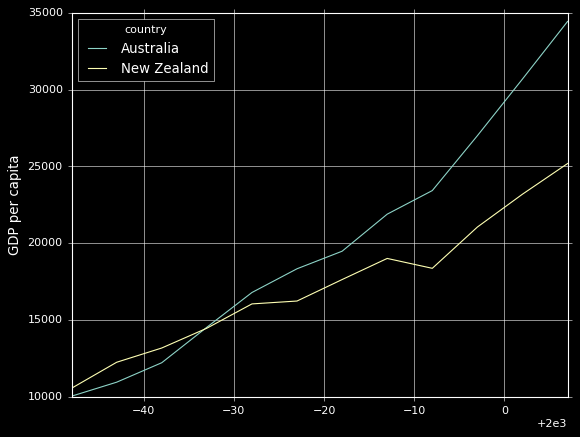

In [145]:
with plt.style.context('dark_background'):
    oceania.T.plot()
    plt.ylabel('GDP per capita')
    plt.savefig('my_figure.png')

## Many styles of plot are available

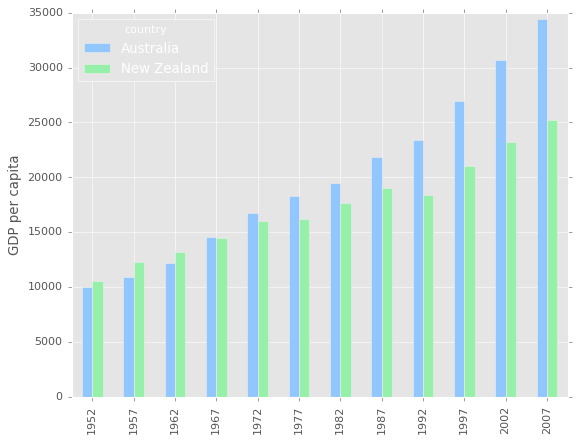

In [146]:
#plt.style.use('ggplot')
oceania.T.plot(kind='bar')
plt.ylabel('GDP per capita');

## Data can also be plotted by calling the `matplotlib` `plot` function directly

- The command is `plt.plot(x, y)`
- The color and format of markers can also be specified as an additional optional argument e.g., `b-` is a blue line, `g--` is a green dashed line.

## Get Australia data from dataframe

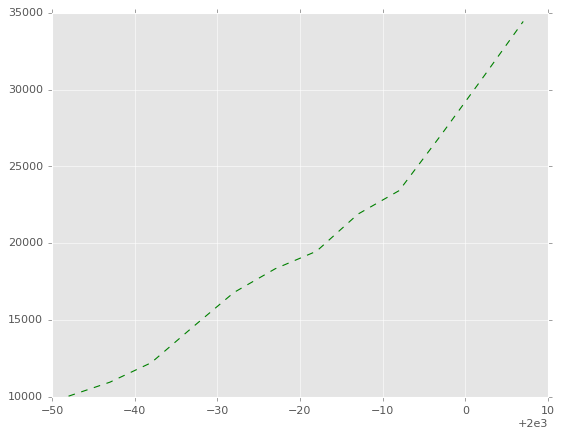

In [147]:
years = oceania.columns
gdp_australia = oceania.loc['Australia']
plt.plot(years, gdp_australia, 'g--');

## Can plot many sets of data together

Text(0, 0.5, 'GDP per capita ($)')

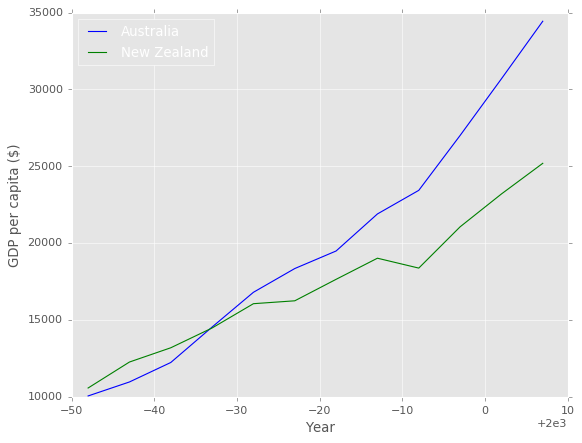

In [148]:
# Select two countries' worth of data.
gdp_australia = oceania.loc['Australia']
gdp_nz = oceania.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

- Plot a scatter plot correlating the GDP of Australia and New Zealand
- Use either `plt.scatter` or `DataFrame.plot.scatter`

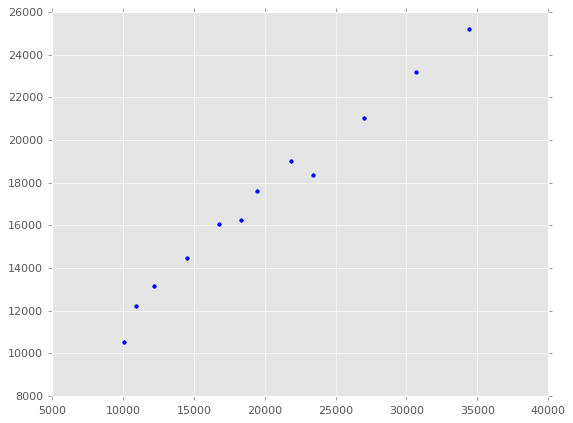

In [149]:
plt.scatter(gdp_australia, gdp_nz);

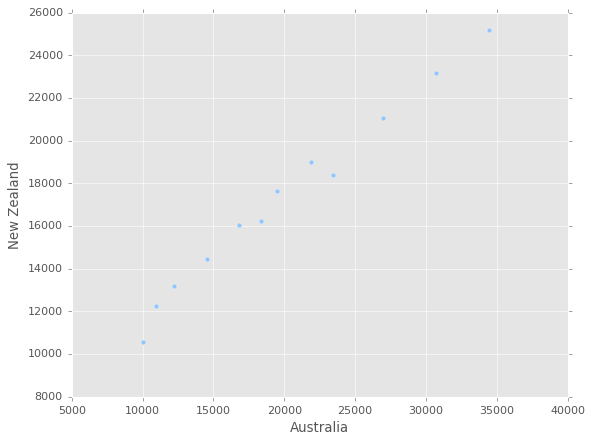

In [150]:
oceania.T.plot.scatter(x='Australia', y='New Zealand');

## Saving your plot to a file

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There is a function in the matplotlib.pyplot module that accomplishes this: [savefig](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html). Calling this function, e.g. with
```python
plt.savefig('my_figure.png')
```
will save the current figure to the file `my_figure.png`. The file format will automatically be deduced from the file name extension (other formats are pdf, ps, eps and svg).

## <mark>[NEW]</mark> With all continents

In [151]:
data = pd.read_csv("gapminder_all.csv", index_col="country")

In [152]:
data.head()

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
country,,,,,,,,,,,,,,,,,,,,,
Algeria,Africa,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
Angola,Africa,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
Benin,Africa,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,1191.207681,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
Botswana,Africa,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,7954.111645,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
Burkina Faso,Africa,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,931.752773,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


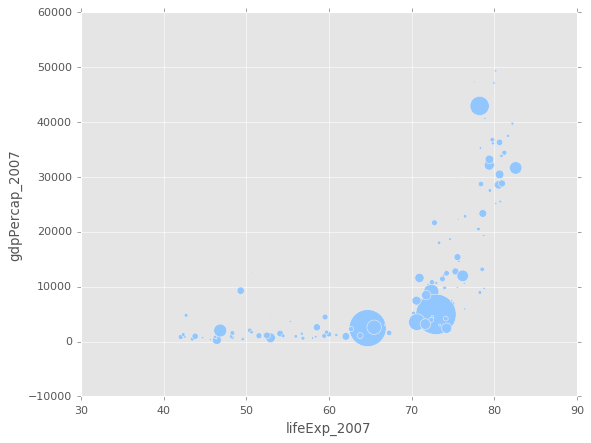

In [153]:
data.plot(
    kind="scatter", 
    y="gdpPercap_2007", 
    x="lifeExp_2007", 
    s=data["pop_2007"]/1e6,
)
plt.savefig("my_figure.pdf")

## <mark>[NEW]</mark> Further reading on matplotlib

1. [Matplotlib cheatsheets and handouts](https://matplotlib.org/cheatsheets/)
1. [Matplotlib tutorials](https://matplotlib.org/stable/tutorials/index.html)
1. [Matplotlib user guide](https://matplotlib.org/stable/users/index.html)